# Week 11 - KMeans

#### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Import Data

In [2]:
X = pd.read_csv("Customer.csv")
X.head()

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,1,Perempuan,23,87,29
1,2,Laki,60,4,30
2,3,Perempuan,21,73,30
3,4,Laki,53,4,33
4,5,Laki,18,92,33


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   IDPelanggan             200 non-null    int64 
 1   Kelamin                 200 non-null    object
 2   Usia                    200 non-null    int64 
 3   Rating_belanja (1-100)  200 non-null    int64 
 4   Pendapatan (juta Rp)    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
X.shape

(200, 5)

In [5]:
X.describe()

,IDPelanggan,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,50.200000,60.560000
std,57.879185,13.969007,25.823522,26.264721
min,1.000000,18.000000,1.000000,15.000000
25%,50.750000,28.750000,34.750000,41.500000
50%,100.500000,36.000000,50.000000,61.500000
75%,150.250000,49.000000,73.000000,78.000000
max,200.000000,70.000000,99.000000,137.000000


#### Select numerical data

In [6]:
# Pilih kolom Rating_belanja (1-100) dan Pendapatan (juta Rp) untuk melakukan K-Means Clustering
X = X.iloc[:, [3,4]].values

#### Elbow Method

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans 

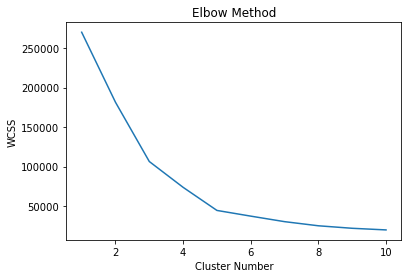

In [7]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

#### Menjalankan K-Means Clustering ke dataset

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)  

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Visualisasi hasil clusters

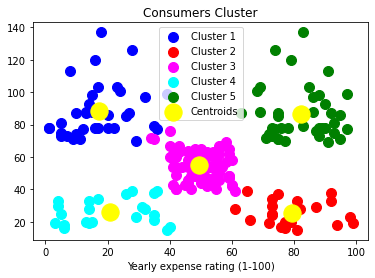

In [9]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c='blue', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c='red', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c='magenta', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c='green', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.xlabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()

# Challenge
1. Sebuah department store ingin menganalisa kelompok perilaku belanja dari pelanggannya, dengan data set yang diberikan buatlah analisa:
- a. gunakan kolom ke 2 hingga 4 sebagai input features
- b. dengan metode elbow, analisa jumlah cluster yang tepat
- c. gunakan K-Means clustering dan analisa hasilnya

2. Sebuah department store ingin menganalisa kelompok perilaku belanja dari pelanggannya, dengan data set yang diberikan buatlah analisa:
- a. gunakan kolom ke 2 hingga 4 sebagai input features
- b. dengan dendogram diagram, analisa jumlah cluster yang tepat
- c. gunakan Hierachical clustering dan analisa hasilnya
- d. bandingkan hasilnya dengan menggunakan metode K-Means

3. Generate data set sebanyak 500 titik data pelatihan bola dengan label yang sesuai
- a. lakukan normalisasi fitur pada proses pelatihan data,
- b. gunakan DBSCAN dari library sklearn
- c. buatlah untuk kasus spherical dan non spherical data
- d. Pada kasus non spherical data, uji coba dengan metode K Means dan bandingkan hasilnya.

### Nomor 1

In [10]:
df = pd.read_csv("Customer.csv")
df.head()

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,1,Perempuan,23,87,29
1,2,Laki,60,4,30
2,3,Perempuan,21,73,30
3,4,Laki,53,4,33
4,5,Laki,18,92,33


In [11]:
a = df

In [12]:
# Encode kolom 'Kelamin'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
a['Kelamin'] = le.fit_transform(a['Kelamin'])
a['Kelamin'].unique()

array([1, 0])

#### 1a. gunakan kolom ke 2 hingga 4 sebagai input features

In [13]:
a = df.iloc[:, 1:4].values

#### 1b. dengan metode elbow, analisa jumlah cluster yang tepat

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans 

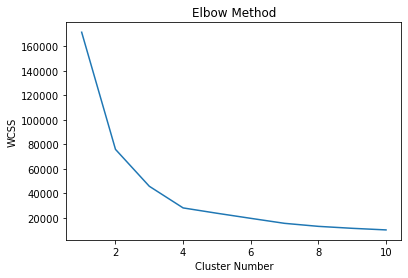

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(a)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

Berdasarkan Elbow Method yang dilakukan, jumlah cluster yang tepat adalah 4

#### c. gunakan K-Means clustering dan analisa hasilnya

In [15]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
a_kmeans = kmeans.fit_predict(a)

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


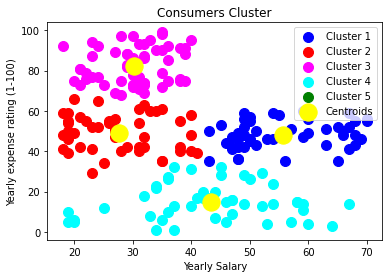

In [17]:
# Visualisasi Hasil Cluster
plt.scatter(a[a_kmeans == 0, 1], a[a_kmeans == 0, 2], s=100, c='blue', label='Cluster 1')
plt.scatter(a[a_kmeans == 1, 1], a[a_kmeans == 1, 2], s=100, c='red', label='Cluster 2')
plt.scatter(a[a_kmeans == 2, 1], a[a_kmeans == 2, 2], s=100, c='magenta', label='Cluster 3')
plt.scatter(a[a_kmeans == 3, 1], a[a_kmeans == 3, 2], s=100, c='cyan', label='Cluster 4')
plt.scatter(a[a_kmeans == 4, 1], a[a_kmeans == 4, 2], s=100, c='green', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='yellow', label='Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()

### Nomor 2

In [18]:
df = pd.read_csv("Customer.csv")
df.head()

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,1,Perempuan,23,87,29
1,2,Laki,60,4,30
2,3,Perempuan,21,73,30
3,4,Laki,53,4,33
4,5,Laki,18,92,33


In [19]:
# Encode kolom 'Kelamin'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Kelamin'] = le.fit_transform(df['Kelamin'])
df['Kelamin'].unique()

array([1, 0])

#### 2a. gunakan kolom ke 2 hingga 4 sebagai input features

In [21]:
b = df.iloc[:, 1:4].values

#### 2b. dengan dendogram diagram, analisa jumlah cluster yang tepat

In [22]:
# Preprocessing with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(b)

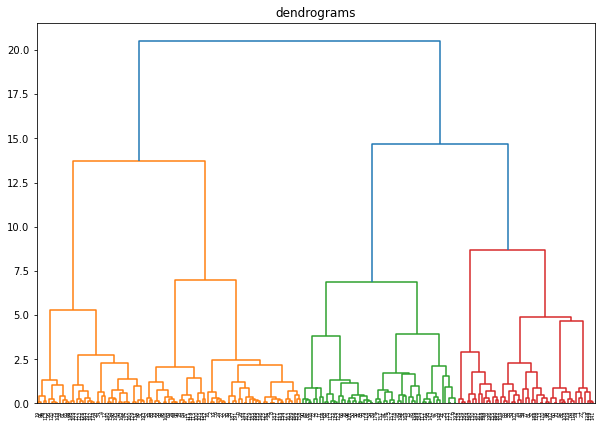

In [23]:
# Draw the Dendrogram
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))
plt.title('dendrograms')
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))

Berdasarkan dendrogram di atas, n_cluster paling optimal adalah sebanyak 4

#### 2c. gunakan Hierachical clustering dan analisa hasilnya

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean',
                                  linkage='ward')
cluster.fit_predict(cluster_scaled)

array([1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 1, 2, 3, 0, 1, 2, 1, 2, 1, 3, 3, 2,
       1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2,
       3, 2, 3, 2, 1, 1, 2, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 2, 0, 3,
       2, 2, 3, 1, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 3, 0, 2, 1, 3, 2, 1, 0, 3, 1, 2, 0, 3, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 2, 3, 1, 1, 0, 3, 0, 3, 0, 3,
       1, 1, 0, 1, 2, 3, 0, 0, 3, 0, 3, 2, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2,
       1, 0, 1, 2, 1, 2, 3, 0, 3, 1, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 0, 3,
       2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3,
       2, 1], dtype=int64)

#### 2d. bandingkan hasilnya dengan menggunakan metode K-Means

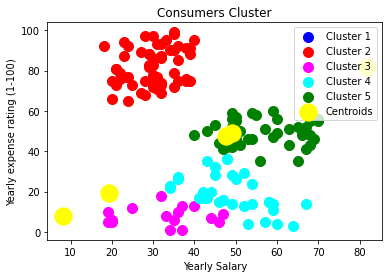

In [33]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

# Menjalankan Hierarchical Clustering
dist_matrix = pdist(b[:, [1, 2]])  # Menghitung matriks jarak
linkage_matrix = linkage(dist_matrix, method='complete')  # Menghasilkan matriks linkage
k = 5  # Jumlah cluster yang diinginkan
labels = fcluster(linkage_matrix, k, criterion='maxclust')  # Mengambil label cluster

# Menghitung rata-rata nilai sumbu y dalam setiap cluster
centroids_y = []
for cluster_label in range(1, k+1):
    cluster_points = b[labels == cluster_label, 2]  # Memilih nilai sumbu y dalam cluster
    centroid_y = np.mean(cluster_points)  # Menghitung rata-rata nilai sumbu y
    centroids_y.append(centroid_y)

# Visualisasi Hasil Cluster yang dihasilkan oleh metode Hierarchical Clustering
plt.scatter(b[labels == 0, 1], b[labels == 0, 2], s=100, c='blue', label='Cluster 1')
plt.scatter(b[labels == 1, 1], b[labels == 1, 2], s=100, c='red', label='Cluster 2')
plt.scatter(b[labels == 2, 1], b[labels == 2, 2], s=100, c='magenta', label='Cluster 3')
plt.scatter(b[labels == 3, 1], b[labels == 3, 2], s=100, c='cyan', label='Cluster 4')
plt.scatter(b[labels == 4, 1], b[labels == 4, 2], s=100, c='green', label='Cluster 5')
plt.scatter(centroids_y, centroids_y, s=300, c='yellow', label='Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()

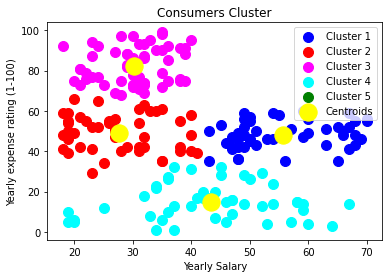

In [36]:
# Visualisasi Hasil Cluster yang dihasilkan oleh metode K-Means
plt.scatter(a[a_kmeans == 0, 1], a[a_kmeans == 0, 2], s=100, c='blue', label='Cluster 1')
plt.scatter(a[a_kmeans == 1, 1], a[a_kmeans == 1, 2], s=100, c='red', label='Cluster 2')
plt.scatter(a[a_kmeans == 2, 1], a[a_kmeans == 2, 2], s=100, c='magenta', label='Cluster 3')
plt.scatter(a[a_kmeans == 3, 1], a[a_kmeans == 3, 2], s=100, c='cyan', label='Cluster 4')
plt.scatter(a[a_kmeans == 4, 1], a[a_kmeans == 4, 2], s=100, c='green', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='yellow', label='Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()

### Nomor 3

Generate data set sebanyak 500 titik data pelatihan bola dengan label yang sesuai

In [58]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=1, cluster_std=0.5, random_state=42)

#### 3a. lakukan normalisasi fitur pada proses pelatihan data

In [59]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### 3b. gunakan DBSCAN dari library sklearn

In [65]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=20)
X_dbscan = dbscan.fit_predict(X)

#### 3c. buatlah untuk kasus spherical dan non spherical data

Kasus Spherical Data

In [82]:
X_spherical, y_spherical = X, y

In [83]:
# Normalization
scaler = StandardScaler()
X_spherical = scaler.fit_transform(X_spherical)

In [84]:
# DBSCAN clustering for spherical data
dbscan = DBSCAN(eps=0.5, min_samples=30)
dbscan_labels_spherical = dbscan.fit_predict(X_spherical)

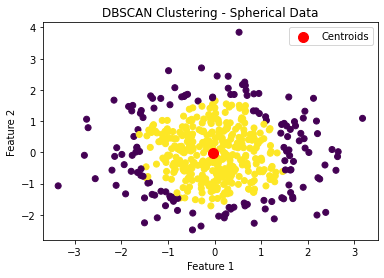

In [98]:
# Plotting DBSCAN clustering for spherical data
plt.scatter(X_spherical[:, 0], X_spherical[:, 1], c=dbscan_labels_spherical)
plt.title('DBSCAN Clustering - Spherical Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Menghitung pusat cluster
unique_labels = np.unique(dbscan_labels_spherical)
centroids = []
for label in unique_labels:
    if label == -1:  # Label noise diabaikan
        continue
    cluster_points = X_spherical[dbscan_labels_spherical == label]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

# Menambahkan centroids pada plot
centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids')

plt.legend()
plt.show()

Kasus Non Spherical Data

In [86]:
from sklearn.datasets import make_moons

# Generate non-spherical data
X_non_spherical, y_non_spherical = make_moons(n_samples=500, noise=0.1, random_state=42)

In [87]:
# Normalization
X_non_spherical = scaler.fit_transform(X_non_spherical)

In [92]:
# DBSCAN clustering for non-spherical data
dbscan = DBSCAN(eps=0.5, min_samples=30)
dbscan_labels_non_spherical = dbscan.fit_predict(X_non_spherical)

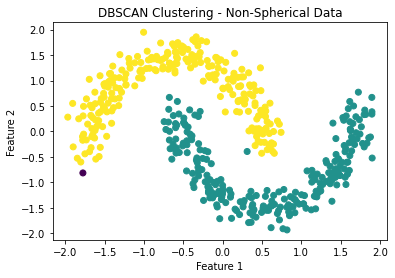

In [94]:
# Plotting non-spherical data with DBSCAN clusters
plt.scatter(X_non_spherical[:, 0], X_non_spherical[:, 1], c=dbscan_labels_non_spherical)
plt.title('DBSCAN Clustering - Non-Spherical Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### 3d. Pada kasus non spherical data, uji coba dengan metode K Means dan bandingkan hasilnya.

In [95]:
# K-means clustering for non-spherical data
kmeans = KMeans(n_clusters=2)
kmeans_labels_non_spherical = kmeans.fit_predict(X_non_spherical)

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


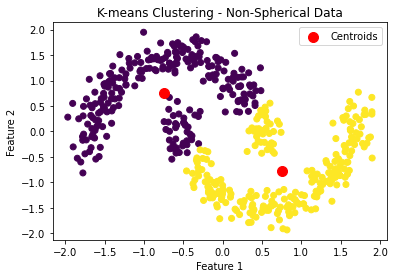

In [96]:
# Plotting non-spherical data with K-means clusters
plt.scatter(X_non_spherical[:, 0], X_non_spherical[:, 1], c=kmeans_labels_non_spherical)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('K-means Clustering - Non-Spherical Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

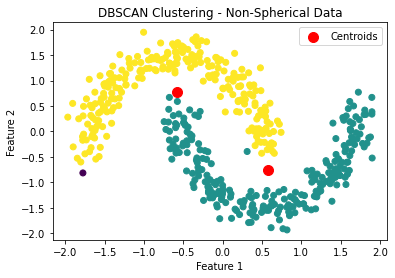

In [99]:
# Plotting non-spherical data with DBSCAN clustering
plt.scatter(X_non_spherical[:, 0], X_non_spherical[:, 1], c=dbscan_labels_non_spherical)
plt.title('DBSCAN Clustering - Non-Spherical Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Menghitung pusat cluster
unique_labels = np.unique(dbscan_labels_non_spherical)
centroids = []
for label in unique_labels:
    if label == -1:  # Label noise diabaikan
        continue
    cluster_points = X_non_spherical[dbscan_labels_non_spherical == label]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

# Menambahkan centroids pada plot
centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids')

plt.legend()
plt.show()